In [1]:
import numpy as np
from skimage import io
import glob
from skimage import measure
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
import sys
import math
import pdb

In [ ]:
pdb.set_trace()

--Call--
> /Users/Paul/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/displayhook.py(252)__call__()
    250         sys.stdout.flush()
    251 
--> 252     def __call__(self, result=None):
    253         """Printing with history cache management.
    254 

ipdb> u
> <ipython-input-2-54799d9a0260>(1)<module>()
----> 1 pdb.set_trace()

ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden


In [2]:
def create_tiff_stack(name, path):
    with tifffile.TiffWriter(name) as stack:
        for filename in glob.glob(path + '/*.tif'):
            stack.save(
                tifffile.imread(filename), 
                photometric='minisblack', 
                contiguous=True
                )
create_tiff_stack(name='box6_seg.tif', path='data/x-ray/boxes/box6_JBW/masks_export')
create_tiff_stack(name='box6_vol.tif', path='data/x-ray/boxes/box6_JBW/volume')
create_tiff_stack(name='box6_stardist.tif', path='data/x-ray/boxes/box6_JBW/masks')

create_tiff_stack(name='box2_seg.tif', path='data/x-ray/boxes/box2_PT/masks_export')
create_tiff_stack(name='box2_vol.tif', path='data/x-ray/boxes/box2_PT/volume')
create_tiff_stack(name='box2_stardist.tif', path='data/x-ray/boxes/box2_PT/masks')

create_tiff_stack(name='box3_seg.tif', path='data/x-ray/boxes/box3_MM/masks_export')
create_tiff_stack(name='box3_vol.tif', path='data/x-ray/boxes/box3_MM/em')
create_tiff_stack(name='box3_stardist.tif', path='data/x-ray/boxes/box3_MM/masks')

create_tiff_stack(name='box4_seg.tif', path='data/x-ray/boxes/box4_DL/masks_export')
create_tiff_stack(name='box4_vol.tif', path='data/x-ray/boxes/box4_DL/em')
create_tiff_stack(name='box4_stardist.tif', path='data/x-ray/boxes/box4_DL/masks')

create_tiff_stack(name='box5_seg.tif', path='data/x-ray/boxes/box5_RM/masks_export')
create_tiff_stack(name='box5_vol.tif', path='data/x-ray/boxes/box5_RM/em')
create_tiff_stack(name='box5_stardist.tif', path='data/x-ray/boxes/box5_RM/masks')

In [ ]:
#file root
file_root = 'x-ray-boxes/'

#volume_JBW = io.imread('box6_vol.tif')
seg_JBW = io.imread(file_root+'box6_seg.tif')
seg_JBW_stardist = io.imread(file_root+'box6_stardist.tif')

#volume_PT = io.imread('box2_vol.tif')
seg_PT = io.imread(file_root+'box2_seg.tif')
seg_PT_stardist = io.imread(file_root+'box2_stardist.tif')

#volume_MM = io.imread('box3_vol.tif')
seg_MM = io.imread(file_root+'box3_seg.tif')
seg_MM_stardist = io.imread(file_root+'box3_stardist.tif')

#volume_DL = io.imread('box4_vol.tif')
seg_DL = io.imread(file_root+'box4_seg.tif')
seg_DL_stardist = io.imread(file_root+'box4_stardist.tif')

#volume_RM = io.imread('box5_vol.tif')
seg_RM = io.imread(file_root+'box5_seg.tif')
seg_RM_stardist = io.imread(file_root+'box5_stardist.tif')


#print('volume shape: ', volume_JBW.shape)
print('masks shape: ', seg_JBW.shape)

In [3]:
#properties = ['label', 'centroid', 'major_axis_length', 'minor_axis_length', 
#              'mean_intensity', 'min_intensity', 'max_intensity', 
#              'area', 'moments', 'bbox']
properties = ['label', 'centroid', 'major_axis_length', 'minor_axis_length', 
              'mean_intensity', 'min_intensity', 'max_intensity', 
              'area', 'bbox']

In [5]:
rp_JBW = measure.regionprops_table(seg_JBW, volume_JBW, properties)
rp_JBW_sd = measure.regionprops_table(seg_JBW_stardist, volume_JBW, properties)

rp_PT = measure.regionprops_table(seg_PT, volume_PT, properties)
rp_PT_sd = measure.regionprops_table(seg_PT_stardist, volume_PT, properties)

rp_MM = measure.regionprops_table(seg_MM, volume_MM, properties)
rp_MM_sd = measure.regionprops_table(seg_MM_stardist, volume_MM, properties)

rp_DL = measure.regionprops_table(seg_DL, volume_DL, properties)
rp_DL_sd = measure.regionprops_table(seg_DL_stardist, volume_DL, properties)

rp_RM = measure.regionprops_table(seg_RM, volume_RM, properties)
rp_RM_sd = measure.regionprops_table(seg_RM_stardist, volume_RM, properties)

In [6]:
df_JBW = pd.DataFrame.from_dict(rp_JBW)
df_JBW_sd = pd.DataFrame.from_dict(rp_JBW_sd)

df_PT = pd.DataFrame.from_dict(rp_PT)
df_PT_sd = pd.DataFrame.from_dict(rp_PT_sd)

df_MM = pd.DataFrame.from_dict(rp_MM)
df_MM_sd = pd.DataFrame.from_dict(rp_MM_sd)

df_DL = pd.DataFrame.from_dict(rp_DL)
df_DL_sd = pd.DataFrame.from_dict(rp_DL_sd)

df_RM = pd.DataFrame.from_dict(rp_RM)
df_RM_sd = pd.DataFrame.from_dict(rp_RM_sd)

In [ ]:
def iou(pred, gt):
    intersection = np.logical_and(pred, gt).astype(np.float32).sum()
    union = np.logical_or(pred, gt).astype(np.float32).sum()
    
    if union == 0:
        iou = 0
    else:
        iou = intersection / union
    return iou

In [ ]:
def add_margin_to_bbox(bbox, margin, shape):
    temp = math.floor(bbox.shape[0]/2)
    for i in range(math.floor(bbox.shape[0]/2)):
        bbox[i] -= margin
        if bbox[i] < 0:
            bbox[i] = 0
    for i in range(math.floor(bbox.shape[0]/2), bbox.shape[0]):
        bbox[i] += margin
        if bbox[i] >= shape[i-temp]:
            bbox[i] = shape[i-temp]-1
    return bbox

In [ ]:
def find_candidates(gt, pred, gt_bbox, df_pred, margin = 0):
    gt_bbox = add_margin_to_bbox(gt_bbox, margin, pred.shape)
    pred_subvol = crop_volume(pred, gt_bbox)
    values = np.unique(pred_subvol)
    pred_labels = np.delete(values, np.where(values == 0))
    df_pred_cand = df_pred.loc[[i for i in pred_labels]]
    return df_pred_cand, pred_labels

In [ ]:
def find_centroid_matches(centroid, df_segments, thresh):
    label_match = []
    distances = []
    df_closest = pd.DataFrame(columns=df_segments.columns)
    smallest_distance = 200000.0
    closest_idx = -1
    for idx, row in df_segments.iterrows():
        
        dist = np.linalg.norm(centroid-row['centroid'])
        distances.append(dist)
        if dist <= thresh:
            label_match.append(idx)
            if smallest_distance <= dist:
                closest_idx = idx
    if closest_idx >= 0:
        df_closest = df.closest.append(df_segments.iloc[closest_idx])
    df_match = df_segments.loc[label_match]
    return df_match, label_match, df_closest, distances

In [ ]:
def evaluate_overlap(gt, pred, gt_label, pred_label, metric='IoU'):
    gt_bin = binarize_segment(gt, gt_label)
    pred_bin = binarize_segment(pred, pred_label)
    return iou(gt_bin, pred_bin)

In [ ]:
def crop_volume(vol, bbox):
    bbox = bbox.astype(int)
    row_start = bbox[0]
    row_end = bbox[3]
    col_start = bbox[1]
    col_end = bbox[4]
    slice_start = bbox[2]
    slice_end = bbox[5]
    return vol[row_start:row_end, col_start:col_end, slice_start:slice_end]

In [ ]:
def get_convex_bbox(bbox_1, bbox_2):
    """
    computes the convex bounding box out of two given bounding boxes.

    Attributes
    ----------
    bbox_1 : 1D np.array
        expected to be of type [row_start, col_start, slice_start, row_end, col_end, slice_end]
    bbox_2 : 1D np.array
        expected to be of type [row_start, col_start, slice_start, row_end, col_end, slice_end]
    return
    -------
    convex_bbox: 1D array of same shape as input
    """
    assert len(bbox_1.shape) == 1 & len(bbox_2.shape) == 1, print("Dimensionality must be of shape 1.")
    assert bbox_1.shape == bbox_2.shape, print("bbox must be of same shapes.")
    convex_bbox = np.zeros(bbox_1.shape)
    #for i in range(math.floor(bbox_1.shape[0]/2)):
    convex_bbox[:math.ceil(bbox_1.shape[0]/2)] = np.minimum(bbox_1, bbox_2)[0:math.floor(bbox_1.shape[0]/2)]
    #for i in range(math.floor(bbox_1.shape[0]/2), bbox_1.shape[0]):
    convex_bbox[math.floor(bbox_1.shape[0]/2):bbox_1.shape[0]] = np.maximum(bbox_1, bbox_2)[math.floor(bbox_1.shape[0]/2):bbox_1.shape[0]]
    return convex_bbox

In [ ]:
def binarize_segment(seg, label):
    seg_bin = np.zeros(seg.shape)
    seg_bin[seg == label] = 1
    return seg_bin

In [ ]:
def find_segment_differences(pred, gt, centroid_thresh, iou_thresh):
    print(sys.getsizeof(pred))
    print(sys.getsizeof(gt))
    properties = ['area', 'bbox', 'centroid']
    df_gt = pd.DataFrame.from_dict(measure.regionprops_table(gt, properties=properties))
    df_pred = pd.DataFrame.from_dict(measure.regionprops_table(pred, properties=properties))
    df_gt['centroid'] = np.nan
    df_pred['centroid'] = np.nan
    df_gt['bbox'] = np.nan
    df_pred['bbox'] = np.nan
    df_gt['match'] = False
    df_pred['match'] = False
    
    df_gt['centroid'] = df_gt.apply(lambda x: np.array([x['centroid-0'], x['centroid-1'], 
                                                        x['centroid-2']]), axis=1)
    df_pred['centroid'] = df_pred.apply(lambda x: np.array([x['centroid-0'], x['centroid-1'], 
                                                            x['centroid-2']]), axis=1)
    df_gt['bbox'] = df_gt.apply(lambda x: np.array([x['bbox-0'], x['bbox-1'], x['bbox-2'], 
                                                    x['bbox-3'], x['bbox-4'], x['bbox-5']]), axis=1)
    df_pred['bbox'] = df_pred.apply(lambda x: np.array([x['bbox-0'], x['bbox-1'], x['bbox-2'], 
                                                        x['bbox-3'], x['bbox-4'], x['bbox-5']]), axis=1)
    
    df_gt_ext = pd.DataFrame(columns=df_gt.columns)
    df_pred_ext = pd.DataFrame(columns=df_pred.columns)
    
    for idx_gt, row_gt in df_gt.iterrows():
        match_found = False
        df_pred_cand, pred_labels = find_candidates(gt, pred, row_gt['bbox'], df_pred, margin = 20)
        df_match, label_match, df_closest, distances = find_centroid_matches(row_gt['centroid'], df_pred_cand, centroid_thresh)
        iou_max = 0
        iou_match = []
        for idx_pred, row_pred in df_match.iterrows():
            bbox = get_convex_bbox(row_gt['bbox'], row_pred['bbox'])
            gt_roi = crop_volume(gt, bbox)
            pred_roi = crop_volume(pred, bbox)
            iou = evaluate_overlap(gt_roi, pred_roi, idx_gt+1, idx_pred+1)
            
            if iou >= iou_thresh:
                iou_match.append((iou, idx_pred))
                if iou >= iou_max:
                    iou_max = iou
                match_found = True
                
        if match_found:
            idx_max = max(iou_match, key = lambda i : i[0])[1]
            df_gt['match'] = True
            df_pred['match'] = True
            df_gt_ext = df_gt_ext.append(df_gt.loc[idx_gt], ignore_index = False)
            df_pred_ext = df_pred_ext.append(df_pred.loc[idx_max], ignore_index = False)
        if  not match_found:
            df_gt_ext = df_gt_ext.append(df_gt.loc[idx_gt], ignore_index = False)
            df_pred_ext = df_pred_ext.append({'area': 0.0, 'centroid': np.array([0.0, 0.0, 0.0]), 
                                              'match': False}, ignore_index = True)
        
    subframe = df_pred[df_pred['match'] == False]
    if subframe.shape[0]>0:
        df_pred_ext = df_pred_ext.append(subframe, ignore_index = False)
        n_rows = subframe.shape[0]
        df_gt_ext = df_gt_ext.append({'area': [0.0]*n_rows, 'centroid': np.array([0.0, 0.0, 0.0])*n_rows, 
                                      'match': [False]*n_rows}, ignore_index=True)            
    return df_gt_ext, df_pred_ext

In [15]:
df_PT, df_PT_sd = find_segment_differences(seg_PT_stardist, seg_PT, centroid_thresh=10, iou_thresh=0.8)


125128
125128


In [16]:
import pdb
%matplotlib inline

In [ ]:
pdb.pm()

> /Users/Paul/anaconda3/envs/py38/lib/python3.8/pdb.py(1632)pm()
   1630 
   1631 def pm():
-> 1632     post_mortem(sys.last_traceback)
   1633 
   1634 

ipdb> 
ipdb> u
> <ipython-input-3-497882a8ebc0>(1)<module>()
----> 1 pdb.pm()

ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> u
*** all frames above hidden
ipdb> 
*** all frames above hidden
ipdb> 
*** all frames above hidden
ipdb> 
*** all frames above hidden
ipdb> 
*** all frames above hidden


In [ ]:
df_JBW, df_JBW_sd = find_segment_differences(seg_JBW_stardist, seg_JBW, centroid_thresh=10, iou_thresh=0.8)


In [ ]:
df_MM, df_MM_sd = find_segment_differences(seg_MM_stardist, seg_MM, centroid_thresh=10, iou_thresh=0.8)


125128
125128


In [1]:
df_DL, df_DL_sd = find_segment_differences(seg_DL_stardist, seg_DL, centroid_thresh=10, iou_thresh=0.8)


NameError: name 'find_segment_differences' is not defined

In [ ]:
df_RM, df_RM_sd = find_segment_differences(seg_RM_stardist, seg_RM, centroid_thresh=10, iou_thresh=0.8)

In [ ]:
print(df_JBW.shape)
print(df_JBW_sd.shape)

print(df_PT.shape)
print(df_PT_sd.shape)

print(df_MM.shape)
print(df_MM_sd.shape)

print(df_DL.shape)
print(df_DL_sd.shape)

print(df_RM.shape)
print(df_RM_sd.shape)

In [365]:
#duplicates = df_PT_ext.duplicated(['centroid-0', 'centroid-1', 'centroid-2'])
duplicates = df_PT_ext[df_PT_ext.applymap(lambda x: x[0] if isinstance(x, list) else x).duplicated('area')]

,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox-4,bbox-5,centroid-0,centroid-1,centroid-2,centroid,bbox,match
44,383,25,19,14,34,27,24,29,22,18,"[29, 22, 18]","[25, 19, 14, 34, 27, 24]",False


In [367]:
area_JBW = df_JBW['area']
area_JBW_sd = df_JBW_sd['area']

area_PT = df_PT['area']
area_PT_sd = df_PT_sd['area']

area_MM = df_MM['area']
area_MM_sd = df_MM_sd['area']

area_DL = df_DL['area']
area_DL_sd = df_DL_sd['area']

area_RM = df_RM['area']
area_RM_sd = df_RM_sd['area']

In [368]:


print(area_JBW.shape)
print(area_JBW_sd.shape)

print(area_PT.shape)
print(area_PT_sd.shape)

print(area_MM.shape)
print(area_MM_sd.shape)

print(area_DL.shape)
print(area_DL_sd.shape)

print(area_RM.shape)
print(area_RM_sd.shape)

(81,)
(97,)
(76,)
(76,)
(100,)
(113,)
(65,)
(96,)
(93,)
(92,)


In [362]:
area_diff_JBW = area_JBW - area_JBW_sd
area_diff_PT = area_PT - area_PT_sd
area_diff_MM =  area_MM - area_MM_sd
area_diff_DL = area_DL - area_DL_sd
area_diff_RM = area_RM - area_RM_sd

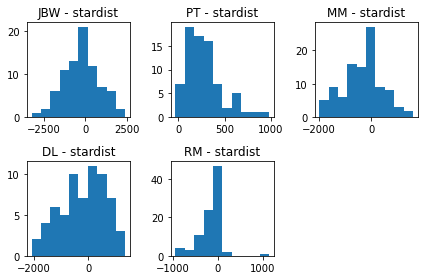

In [363]:
#JBW_bins = np.unique(area_diff_JBW.values)
#PT_bins = np.unique(area_diff_PT.values)

fig = plt.figure()
#fig.title("histogramms: area difference compared to stardist segmentation")
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax1.hist(area_diff_JBW.values)#, bins = JBW_bins) 
ax1.set_title("JBW - stardist")
#ax1.set_xlabel('intensity bins')

ax2.hist(area_diff_PT.values)#, bins = PT_bins) 
ax2.set_title("PT - stardist")

ax3.hist(area_diff_MM.values)#, bins = PT_bins) 
ax3.set_title("MM - stardist")

ax4.hist(area_diff_DL.values)#, bins = PT_bins) 
ax4.set_title("DL - stardist")

ax5.hist(area_diff_RM.values)#, bins = PT_bins) 
ax5.set_title("RM - stardist")
#ax2.set_xlabel('intensity bins')
'''
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=1, 
                    top=1, 
                    wspace=2, 
                    hspace=0.2)
'''
plt.tight_layout()

plt.show()